# 中文字手寫圖片合成，基礎教學
將印刷體或開源手寫圖片，與任意背景圖片合成

In [1]:
#@title 下載開源手寫影像資料

!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git
!cat /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data*.zip* > /content/Traditional-Chinese-Handwriting-Dataset/data/all_data.zip
!unzip -q /content/Traditional-Chinese-Handwriting-Dataset/data/all_data.zip -d "/content"
# folder: "cleaned_data(50_50)"

Cloning into 'Traditional-Chinese-Handwriting-Dataset'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 174 (delta 75), reused 22 (delta 6), pack-reused 18
Receiving objects: 100% (174/174), 77.40 MiB | 28.20 MiB/s, done.
Resolving deltas: 100% (77/77), done.
warning [/content/Traditional-Chinese-Handwriting-Dataset/data/all_data.zip]:  113239279 extra bytes at beginning or within zipfile
  (attempting to process anyway)


In [2]:
#@title 下載開源印刷體字型

!wget -q https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Medium.otf
!wget -q https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Bold.otf
# font: "NotoSansCJKtc-Medium.otf", "NotoSansCJKtc-Bold.otf"

In [3]:
#@title 取得背景圖片範例

!git clone https://github.com/KuanHaoHuang/tbrain-esun-handwriting-recognition/

Cloning into 'tbrain-esun-handwriting-recognition'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [4]:
#@title 安裝套件

!pip install -U albumentations --quiet

     |████████████████████████████████| 98 kB 7.4 MB/s 
     |████████████████████████████████| 37.1 MB 50 kB/s 


In [5]:
!ls

'cleaned_data(50_50)'	    sample_data
 NotoSansCJKtc-Bold.otf     tbrain-esun-handwriting-recognition
 NotoSansCJKtc-Medium.otf   Traditional-Chinese-Handwriting-Dataset


In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageFont, ImageDraw
import numpy as np
import random
import cv2
from skimage import io, transform
import albumentations as A
from pathlib import Path
RANDOM_SEED = 42

img_path = Path("cleaned_data(50_50)") # 手寫圖片
bg_path = Path("tbrain-esun-handwriting-recognition/images") # 範例背景圖片

# 函式：圖片統一大小
def resize(img, height=120, width=120):
    resize = A.Resize(height=height, width=width)
    return resize(image=img)['image']

# 函式：Data Augmentation
def transform_image(img): 
    trafo = A.Compose(
        [
            A.ShiftScaleRotate(p=1.0, shift_limit=0.15, scale_limit=0.2, rotate_limit=10, border_mode=cv2.BORDER_REPLICATE),
            A.GaussianBlur(blur_limit=(3, 5), p=0.1), 
            A.RGBShift(p=1, r_shift_limit=(6, 60), g_shift_limit=(6, 60), b_shift_limit=(6, 60)),
            A.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05, p=0.3)
        ]
    )
    return trafo(image=img)['image']

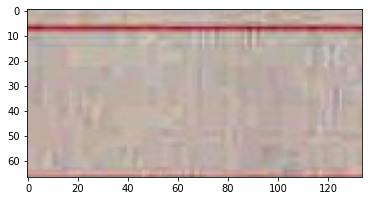

In [24]:
#@title 範例：背景圖片
random.seed(RANDOM_SEED)

background_img = random.sample([f for f in bg_path.iterdir() if f.is_file()], 1)[0]
background_img = io.imread(background_img)
plt.imshow(background_img)

## 教學 1: 合成印刷體圖片

印刷體


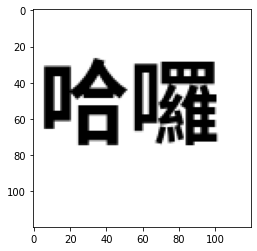


印刷體 + Data Augmentation


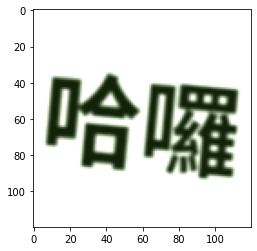

In [25]:
#@title 範例：印刷體圖片

# 宣告字型與大小
font_type = 'NotoSansCJKtc-Bold.otf'
font_size = 50
font = ImageFont.truetype(font_type, font_size, encoding='utf-8')
# 設定圖片的畫框
frame = np.zeros((120, 120, 3), np.uint8)
frame[...] = 255. # 初始化：純白色底
frame = Image.fromarray(frame)
draw = ImageDraw.Draw(frame)
chr_position = (3, 12) # 印刷體出現在畫框的位置
chr_color = (0, 0, 0) # 印刷體顏色：純黑色
chr_content = "哈囉"
draw.text(chr_position, chr_content, chr_color, font=font)
img = np.array(frame)
print("印刷體")
plt.imshow(img)
plt.show()
print()
print("印刷體 + Data Augmentation")
plt.imshow(transform_image(img))
plt.show()

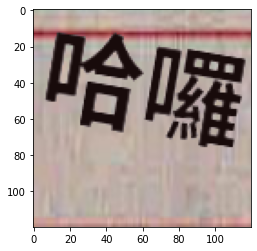

In [26]:
#@title 印刷體與背景合成

new_img = np.min(
    [transform_image(resize(img)), resize(background_img)], 
    axis=0)
plt.imshow(new_img)

## 教學 2：合成手寫圖片

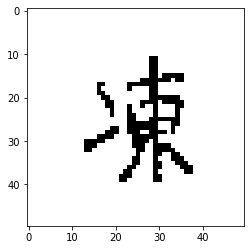

In [28]:
#@title 範例：開源手寫圖片
random.seed(RANDOM_SEED)

handwrite_img = random.sample([f for f in img_path.iterdir() if f.is_file()], 1)[0]
handwrite_img = io.imread(handwrite_img)
plt.imshow(handwrite_img)

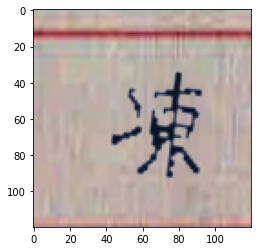

In [29]:
#@title 手寫圖片與背景合成

new_img = np.min(
    [transform_image(resize(handwrite_img)), resize(background_img)], 
    axis=0)
plt.imshow(new_img)